In [2]:
import pandas as pd
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.shape
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [5]:
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [6]:
df.sample(5)

,Unnamed: 0,headline,url,publisher,date,stock
399416,401598,Ebay CEO: $1 for every $10 are Bought Through ...,https://www.benzinga.com/media/cnbc/12/02/2374...,Allie Wickman,2012-02-27 00:00:00,EBAY
1287986,1294155,"UPDATE: Cantor Fitzgerald Initiates Sell, $33 ...",https://www.benzinga.com/analyst-ratings/analy...,David Johnson,2012-03-30 00:00:00,UNFI
121338,122218,"Stocks Which Set New 52-Week Low Yesterday, Oc...",https://www.benzinga.com/trading-ideas/technic...,Benzinga Newsdesk,2018-10-12 00:00:00,AXDX
603191,606338,51 Stocks Moving In Tuesday's Mid-Day Session,https://www.benzinga.com/news/19/11/14841630/5...,Lisa Levin,2019-11-19 00:00:00,HD
312055,313807,"Notable Insider Buys This Past Week: Bunge, Ha...",https://www.benzinga.com/news/19/05/13809584/n...,Nelson Hem,2019-05-26 00:00:00,CTSH


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))

df['headline_length'].describe()


count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64

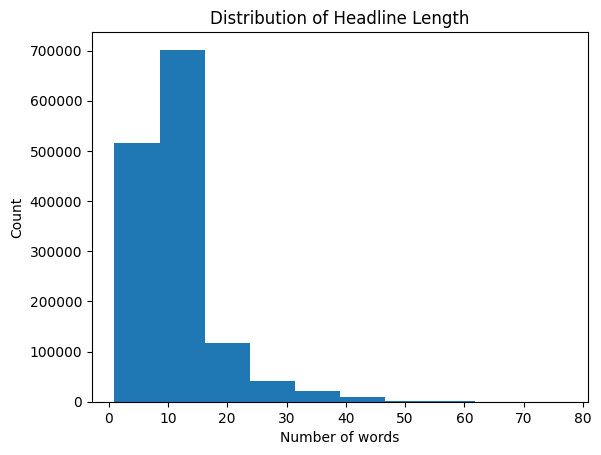

In [10]:
plt.hist(df['headline_length'])
plt.title("Distribution of Headline Length")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()


In [11]:
publisher_counts = df['publisher'].value_counts()

publisher_counts.head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

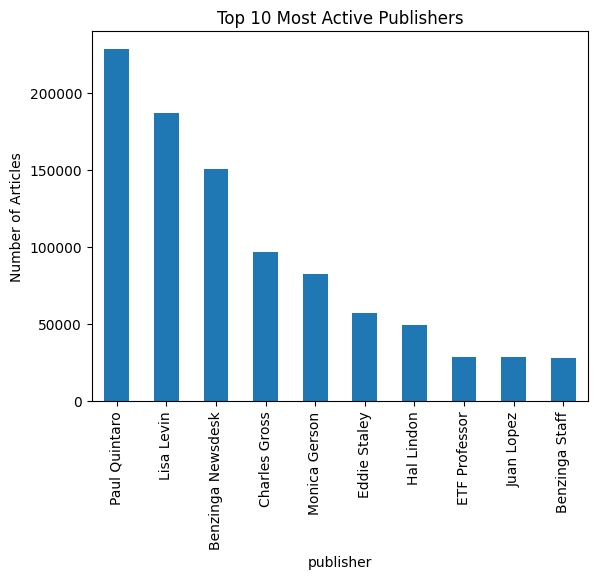

In [12]:
publisher_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most Active Publishers")
plt.ylabel("Number of Articles")
plt.show()


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
invalid = df[df['date'].isna()]
invalid


# df['date'].head(20)




,Unnamed: 0,headline,url,publisher,date,stock,headline_length
10,10,30 Stocks Moving in Friday's Pre-Market Session,https://www.benzinga.com/news/20/05/16092879/3...,Lisa Levin,NaT,A,7
11,11,SVB Leerink Maintains Outperform on Agilent Te...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,NaT,A,12
12,12,8 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/05/16089803/8...,Tyree Gorges,NaT,A,7
13,13,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,NaT,A,16
14,14,Agilent Technologies Q2 Adj. EPS $0.71 Beats $...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,NaT,A,14
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX,7
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX,7
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX,8
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX,8


In [14]:
# Extract time components for analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['date_only'] = df['date'].dt.date  # For daily aggregation
df['month_year'] = df['date'].dt.to_period('M')  # For monthly aggregation

/tmp/ipykernel_22080/2316502035.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['date'].dt.to_period('M')  # For monthly aggregation


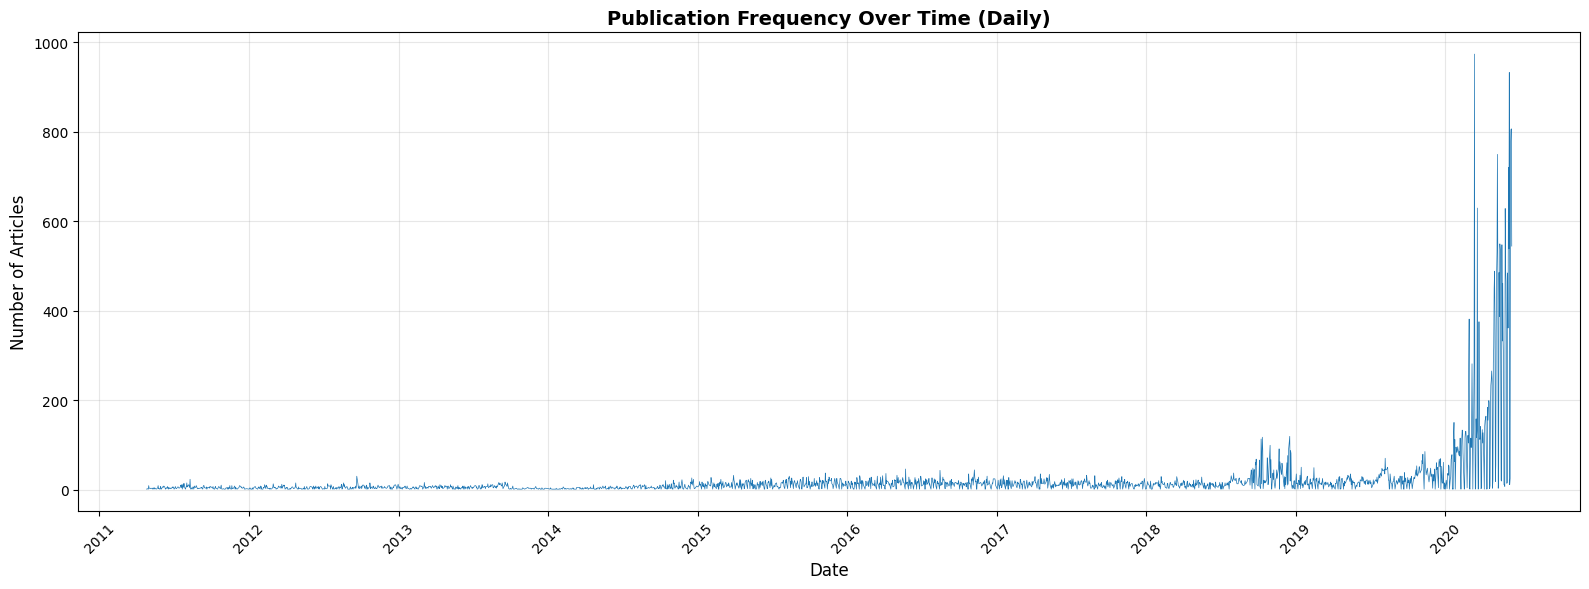

DAILY PUBLICATION STATISTICS
Mean articles per day: 22.15
Median articles per day: 9.00
Max articles in a day: 973
Date with max articles: 2020-03-12
Min articles in a day: 1
Date with min articles: 2011-04-27
Standard deviation: 68.14


In [15]:
# 1. Daily Publication Frequency Over Time
daily_counts = df.groupby('date_only').size()

# Plot daily trends
plt.figure(figsize=(16, 6))
daily_counts.plot(kind='line', linewidth=0.5)
plt.title('Publication Frequency Over Time (Daily)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print("=" * 60)
print("DAILY PUBLICATION STATISTICS")
print("=" * 60)
print(f"Mean articles per day: {daily_counts.mean():.2f}")
print(f"Median articles per day: {daily_counts.median():.2f}")
print(f"Max articles in a day: {daily_counts.max()}")
print(f"Date with max articles: {daily_counts.idxmax()}")
print(f"Min articles in a day: {daily_counts.min()}")
print(f"Date with min articles: {daily_counts.idxmin()}")
print(f"Standard deviation: {daily_counts.std():.2f}")

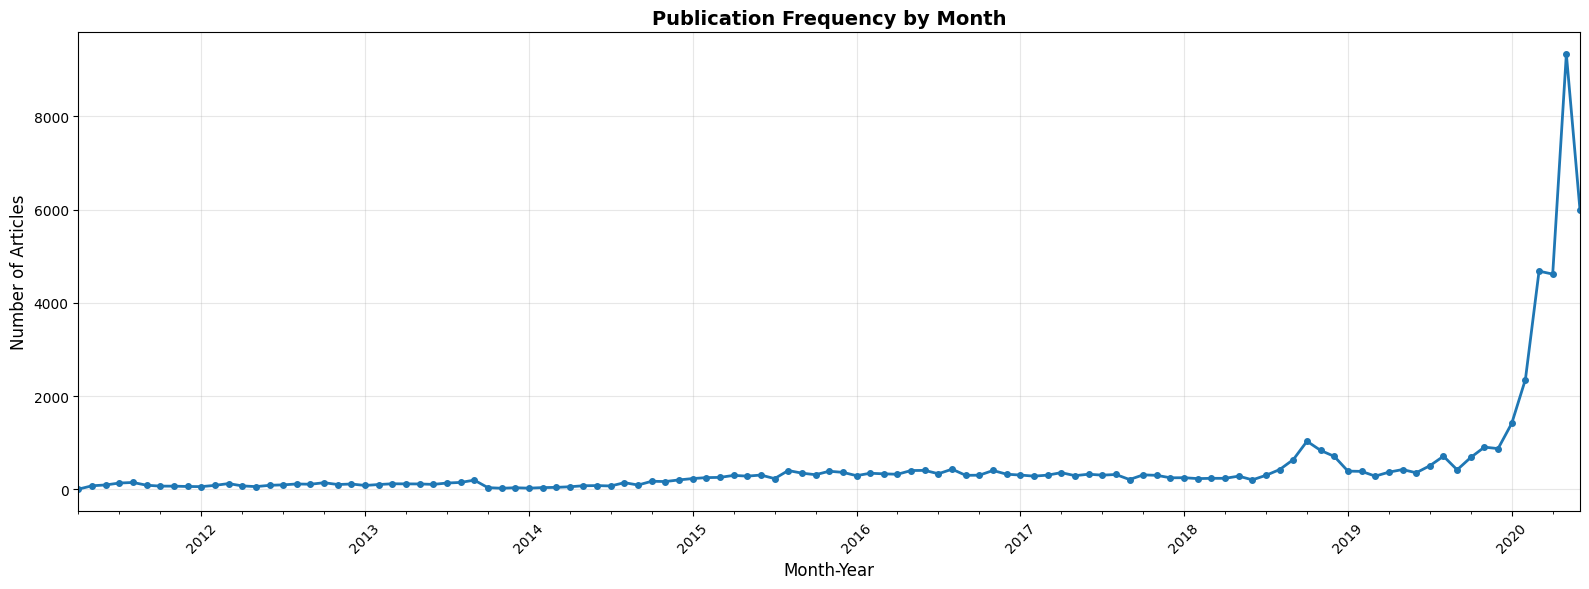


MONTHLY STATISTICS
Month with most articles: 2020-05 (9333 articles)
Month with least articles: 2011-04 (6 articles)


In [16]:
# 2. Monthly Trends
monthly_counts = df.groupby('month_year').size()

plt.figure(figsize=(16, 6))
monthly_counts.plot(kind='line', marker='o', linewidth=2, markersize=4)
plt.title('Publication Frequency by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("MONTHLY STATISTICS")
print("=" * 60)
print(f"Month with most articles: {monthly_counts.idxmax()} ({monthly_counts.max()} articles)")
print(f"Month with least articles: {monthly_counts.idxmin()} ({monthly_counts.min()} articles)")

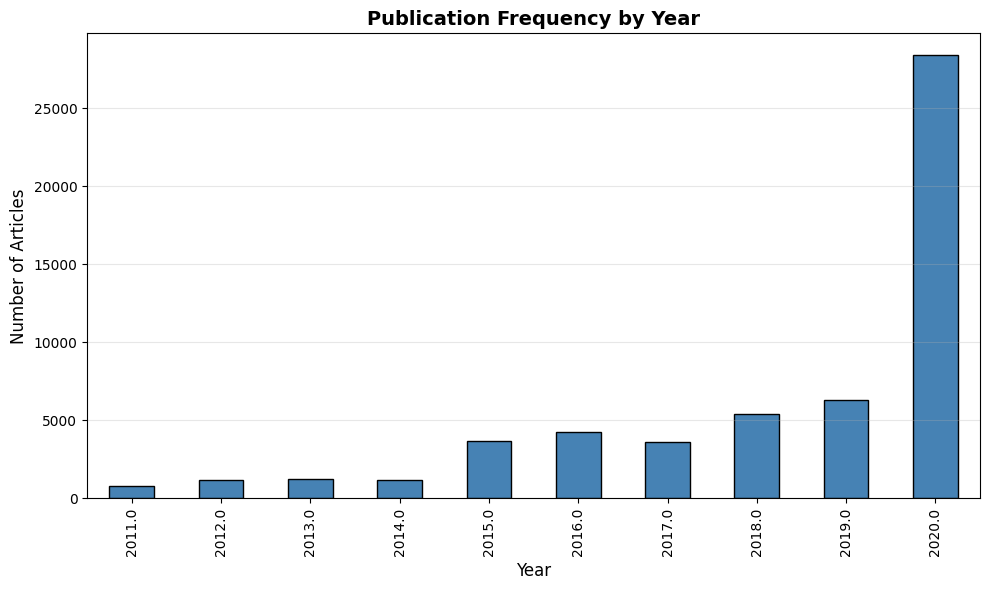


YEARLY STATISTICS
2011.0: 760 articles
2012.0: 1,187 articles
2013.0: 1,240 articles
2014.0: 1,189 articles
2015.0: 3,695 articles
2016.0: 4,223 articles
2017.0: 3,581 articles
2018.0: 5,395 articles
2019.0: 6,325 articles
2020.0: 28,392 articles


In [ ]:
# 3. Yearly Trends
yearly_counts = df.groupby('year').size()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Publication Frequency by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("YEARLY STATISTICS")
print("=" * 60)
for year, count in yearly_counts.items():
    print(f"{year}: {count:,} articles")

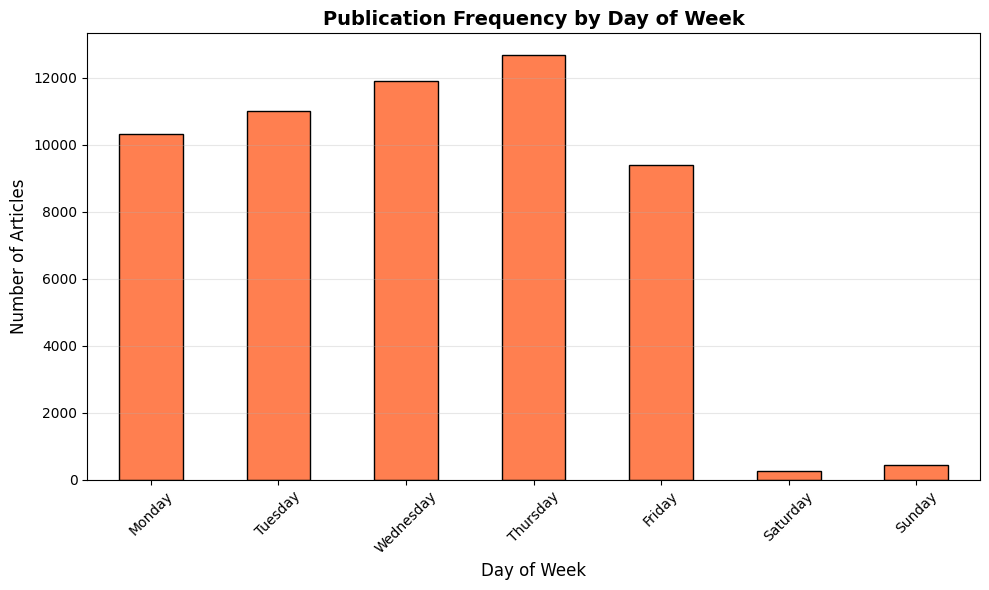


DAY OF WEEK STATISTICS
Monday: 10,322 articles (0.73%)
Tuesday: 11,002 articles (0.78%)
Wednesday: 11,891 articles (0.84%)
Thursday: 12,688 articles (0.90%)
Friday: 9,381 articles (0.67%)
Saturday: 267 articles (0.02%)
Sunday: 436 articles (0.03%)

Most active day: Thursday
Least active day: Saturday


In [23]:
# 4. Day of Week Patterns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Publication Frequency by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("DAY OF WEEK STATISTICS")
print("=" * 60)
for day, count in day_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{day}: {count:,} articles ({percentage:.2f}%)")
print(f"\nMost active day: {day_counts.idxmax()}")
print(f"Least active day: {day_counts.idxmin()}")

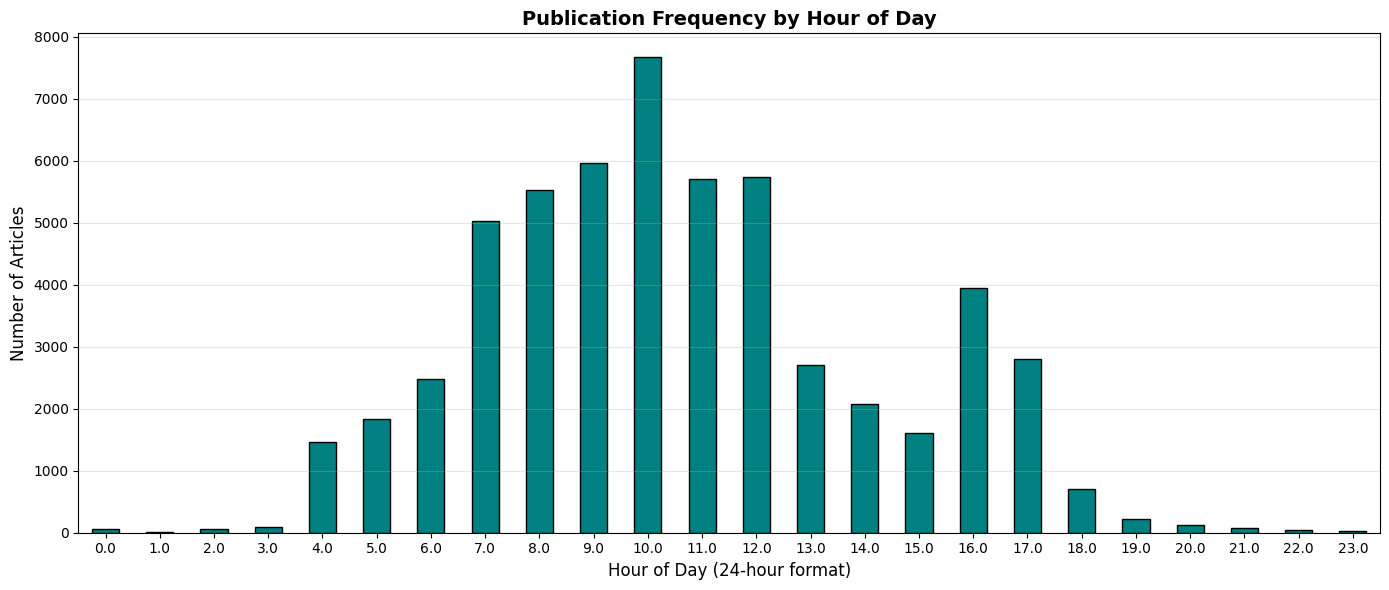


PUBLISHING TIME STATISTICS
Peak publishing hour: 10.0:00 (7,669 articles)
Least active hour: 1.0:00 (14 articles)

Articles during business hours (9 AM - 5 PM): 38,203 (2.71%)
Articles outside business hours: 1,369,125 (97.29%)


In [22]:
# 5. Hour of Day Analysis (Publishing Time Patterns)
hour_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
hour_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Publication Frequency by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("PUBLISHING TIME STATISTICS")
print("=" * 60)
print(f"Peak publishing hour: {hour_counts.idxmax()}:00 ({hour_counts.max():,} articles)")
print(f"Least active hour: {hour_counts.idxmin()}:00 ({hour_counts.min():,} articles)")

# Identify business hours vs non-business hours
business_hours = df[df['hour'].between(9, 17)]
non_business = df[~df['hour'].between(9, 17)]
print(f"\nArticles during business hours (9 AM - 5 PM): {len(business_hours):,} ({(len(business_hours)/len(df)*100):.2f}%)")
print(f"Articles outside business hours: {len(non_business):,} ({(len(non_business)/len(df)*100):.2f}%)")

In [27]:
from collections import Counter
import re

def extract_words(text):
    words = re.findall(r'\b[a-zA-Z]+\b', str(text).lower())
    return words

all_words = []

for h in df['headline']:
    all_words.extend(extract_words(h))

word_counts = Counter(all_words).most_common(20)
word_counts


[('to', 404127),
 ('of', 270981),
 ('on', 245970),
 ('for', 239917),
 ('s', 239752),
 ('in', 223581),
 ('the', 213218),
 ('vs', 162099),
 ('stocks', 161776),
 ('est', 140604),
 ('eps', 128897),
 ('from', 120805),
 ('market', 120558),
 ('shares', 114313),
 ('and', 113924),
 ('reports', 108710),
 ('update', 91723),
 ('earnings', 87399),
 ('a', 85774),
 ('with', 84257)]

In [29]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thewoman/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Remove stop words like ( the , on , is ) words and count 

In [30]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words("english"))

def clean_and_extract_words(text):
    # keep only letters
    words = re.findall(r'\b[a-zA-Z]+\b', str(text).lower())
    # remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words


In [31]:
all_words = []

for h in df['headline']:
    all_words.extend(clean_and_extract_words(h))


In [32]:
from collections import Counter

word_counts = Counter(all_words).most_common(20)
word_counts


[('vs', 162099),
 ('stocks', 161776),
 ('est', 140604),
 ('eps', 128897),
 ('market', 120558),
 ('shares', 114313),
 ('reports', 108710),
 ('update', 91723),
 ('earnings', 87399),
 ('sales', 79645),
 ('top', 79632),
 ('benzinga', 74516),
 ('pt', 73068),
 ('week', 69572),
 ('announces', 66591),
 ('price', 64407),
 ('buy', 64371),
 ('mid', 62263),
 ('downgrades', 61959),
 ('trading', 61182)]

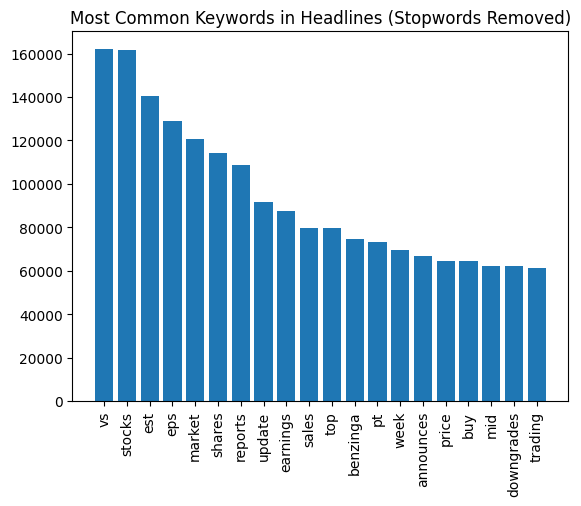

In [33]:
words, counts = zip(*word_counts)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Most Common Keywords in Headlines (Stopwords Removed)")
plt.show()
